<a href="https://colab.research.google.com/github/EstebanArellanesConde/DSA-II/blob/main/Programas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad #1 (6 puntos)**

**1.**   Demostración práctica de la eficiencia de los métodos de ordenamiento: Para los métodos de ordenamiento (Bubble sort, Merge sort, Heap sort, Quick sort, Radix sort, Counting sort.)

  **a)** Adecuarlos para que todos funcionen con valores numéricos positivos y negativos. 
  
  **b)** Cada método se debe probar con vectores generados de forma aleatoria que van de -1000 a 1000, el tamaño de los vectores con los que se harán pruebas son: 500, 1000, 2000, 5000, 10000, 20000, 40000, 80000, 100000, 150000, 200000, 250000. Nota: Es muy importante en se temen unas cuantas capturas de pantalla, y se deben ver en todos los métodos valores
negativos y positivos, si no se visualizan valores negativos se perderá
mucho puntaje.
 
  **c)** Para cada método se debe registrar la relación de cantidad de datos y tiempo requerido para su ordenamiento, lo anterior de forma tabular, para posteriormente generar la respectiva gráfica de cantidad de elementos(x), y tiempo (y). Nota: Se debe poder apreciar las unidades en las que se da el tiempo. 
 
  **d)** Se deben comparar las gráficas obtenidas de forma práctica, con las gráficas teóricas para cada algoritmo.
  
  **e)** Se debe argumentar con base a lo obtenido, que método es mejor para ordenar datos numéricos.

  **f)** Se tienen que adjuntar los programas utilizados, (deberán ser los QUE SE ANALIZARON EN LAS CLASES, CON LAS MODIFICACIONES PERTINENTES), y en el reporte todo debe estar argumentado, las gráficas deben ser a color.

**2.**   Cada equipo seleccionará la máquina más rápida de entre sus integrantes de dicha máquina se debe registrar la siguiente información:

*   Algoritmo y código usado
*   Sistema operativo
*   Velocidad del procesador, número de procesadores.
*   Cantidad de memoria RAM.

2500
El tiempo de ejecucion es 0.9169347286224365


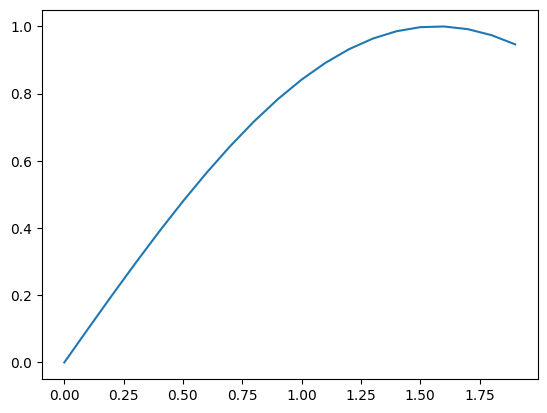

In [3]:
#Actividad1 - ALGORITMO BUBBLE SORT

import math
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import time

def bubbleSort(A):
    tamanio = len(A)
    i = tamanio-1
    j = 0
    for i in range (tamanio-1, i<0,-1):
        for j in range (0,tamanio-1):
            if(A[j] > A[j + 1]):
                aux = A[j]
                A[j] = A[j + 1]
                A[j + 1] = aux
        
A = []
for i in range(2500):
    A.append(randint(-1000,1000))

start = time.time()
bubbleSort(A)
end = time.time()
print(len(A))
print(f'El tiempo de ejecucion es {end-start}')

x = np.array(range(20))*0.1
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = math.sin(x[i])

plt.plot(x,y)
plt.show()

In [4]:
#Actividad1 - ALGORITMO RADIX SORT

import time
from random import randint
#Funcion CountingSort
def countingSort(arr, exp1):

    #Se obtiene el tamaño del arreglo
    n = len(arr)

    #Contador de los positivos
    n1 = 0
    #Contador de los negativos
    n2 = 0

    #Se cuenta cuantos valores negativos y positivos existen en el arreglo
    for j in range(0, len(arr)):
        if arr[j] >= 0:
            n1 = n1+1
        else:
            n2 = n2+1
    
    #Se crean los arreglos de salida
    #El de los positivos
    output = [0] * (n1)
    #El de los negativos
    output2 = [0] * (n2)

    #Se crean las matrices de conteo
    #La de los positivos
    count = [0] * (10)
    #La de los negativos
    count2 = [0] * (10)    

    #Se hace la cuenta en cada matriz de conteo con sus condicionales en caso de quel valor sea positvo o negativo
    for i in range(0, n):
        index = arr[i]

        #En caso de que sea positivo, se cuente en la de los positivos
        if index >= 0:
            index = arr[i] // exp1
            count[index % 10] += 1
        #En caso de que sea negativo, se cuente en la de los negativos
        else:
            index = index*(-1)
            index = index // exp1
            count2[index % 10] += 1

    #Se realiza la suma en las matrices de conteo
    for i in range(1, 10):
        count[i] += count[i - 1]
        count2[i] += count2[i - 1]
        
    #Se hace el ordenamiento con sus condicionales en cada arreglo de salida, tanto para el arreglo de salida de los positivos como la de los negativos y se hace la resta correspondiente en su matriz de conteo
    i = n - 1
    while i >= 0:
        index = arr[i]
        if index >= 0:
            index = index// exp1
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
        else:
            index = index * (-1)
            index = index // exp1
            output2[count2[index % 10] - 1] = arr[i]
            count2[index % 10] -= 1
        i -= 1
    
    #Se procede a inscribir los datos de los arreglos de salida en el arreglo original
    i = 0
    #En caso de que no hayan existido valores negativos en el arreglo, se iscribira unicamente el arreglo de salida de los positivos en el arreglo original
    if n2 == 0:
        for i in range(0, len(arr)):
            arr[i] = output[i]
    #En caso de que hayan existido valores negativos, se utilizaran dos auxiliares
    else:
        aux1 = 0
        aux2 = 0
        #Se utilizaran dos ciclos para inscribir el arreglo de salida de los negativos en la parte inicial del arreglo original y posteriormente se inscribira el arreglo de salida de los positivos despues de los negativos en el arreglo original
        for z in range(0, n2, 1):
            arr[aux1] = output2[z]
            aux1 = aux1 + 1
        for m in range(n2, len(arr), 1):
            arr[m] = output[aux2]
            aux2 = aux2 + 1

#Funcion RadixSort
def radixSort(arr):
    #Se encuentra el valor maximo del arreglo
    max1 = max(arr)
    #Se inicializa exp para las unidades para posteriormente incrementar acorde a las necesidades del algoritmo a ordenar
    exp = 1
    #Se inicializa contador el cual servirá para saber cuantos valores negativos tiene el arreglo
    contador = 0

    #Se realiza la función de countingSort
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10
    
    #Se calcula cuantos valores negativos tiene el arreglo
    for p in range(0, len(arr)):
        if arr[p] < 0:
            contador = contador + 1
    
    #En caso de que exista al menos un valor negativo, se hara uso de la funcion negativos
    if contador > 0:
        negativos(contador)
    
    #En caso de que el valor maximo sea menor o igual a 0, significa que todos los valores del arreglo son menores o iguales a 0
    if max1 <= 0:
        #Se hara uso de un arreglo de apoyo
        apoyo = arr
        #Se procedera a multiplicar el arreglo de apoyo por -1
        for k in range (0,len(apoyo)):
            apoyo[k] = apoyo[k]*(-1)
        #Se vuelve a calcular el valor maximo del arreglo ya que ahora todos son positivos
        max1 = max(apoyo)
        #Se realiza el ordenamiento como si todo el arreglo hubiese sido positivo
        while max1 / exp >= 1:
            countingSort(apoyo, exp)
            exp *= 10
        #Se procedera a multiplicar el arreglo por -1 para regresar a los valores que habia en un inicio
        for k in range (0,len(apoyo)):
            apoyo[k] = apoyo[k]*(-1)
        #Una vez este el arreglo ordenado se invertira ya que esta ordenado de forma ascendente (como si fuesen positivos) por lo que esta ordenado de forma descendente
        arr = apoyo.reverse()

#Funcion negativos, se hara uso de ella en caso de que exista al menos 1
def negativos(contador):
    #Se crea un arreglo auxiliar con 0's del tamaño de los valores negativos en el arreglo original
    arr2 = [0] * (contador)
    #Se usa el ciclo para inscribir todos los valores negativos del arreglo original en el auxiliar
    for i in range(0, contador):
        arr2[i] = arr[i]
    #Se inicializa una variable auxiliar que nos permitirá con un ciclo invertir el arreglo auxiliar para que este ordenado de forma ascendente y se inscribira al inicio del arreglo original, asi estara ordenado de forma ascendente todo este arreglo 
    aux = contador-1
    for j in range(0, contador):
        arr[aux] = arr2[j]
        aux = aux -1

#Declaracion del arreglo propuesto por la practica
#arr = [170, 45, 75, 90, 802, 24, 2, 66]
#Arreglo propuesto para su verificacion con los negativos
#arr = [432, -543, 213, 0, -432, 423, 54, -324, 23, 54, -5, -65, 99, -130]
arr = []
for i in range(200):
    arr.append(randint(-1000,1001))
start = time.time()
#Se llama a la funcion RadixSort
radixSort(arr)
end = time.time()
#Se imprime el arreglo
print("El arreglo ordenado es: ")
for i in range(len(arr)):
    print(arr[i],end=" ")

print("El tiempo que ha tardado en ejecutarse con el algoritmo de RadixSort es: ", end-start)

El arreglo ordenado es: 
-999 -977 -974 -957 -927 -908 -902 -902 -901 -898 -884 -880 -872 -871 -869 -864 -848 -822 -793 -769 -764 -756 -753 -726 -711 -700 -700 -683 -657 -645 -637 -614 -607 -599 -578 -564 -561 -558 -553 -546 -544 -533 -523 -520 -511 -463 -424 -424 -359 -359 -357 -356 -355 -331 -331 -323 -321 -320 -280 -275 -272 -267 -260 -260 -252 -245 -240 -218 -213 -211 -211 -188 -183 -168 -167 -165 -161 -156 -156 -143 -130 -122 -120 -109 -100 -96 -92 -89 -87 -85 -79 -74 -71 -62 -59 -45 -24 -11 -1000 1 13 28 36 40 41 45 65 75 84 98 101 120 125 147 149 159 162 163 167 178 201 204 227 237 243 255 268 273 282 287 290 300 305 320 322 331 331 340 342 348 377 386 392 396 398 398 408 411 413 440 467 472 473 474 492 503 514 523 531 548 553 554 578 582 599 614 622 625 638 652 664 717 722 724 728 732 754 766 773 788 799 842 857 891 894 903 906 912 917 933 945 946 953 965 968 969 973 990 991 992 El tiempo que ha tardado en ejecutarse con el algoritmo de RadixSort es:  0.0007042884826660156


In [ ]:
#Actividad1 - ALGORITMO COUNTING SORT

from random import randint
import time

# Counting sort (Código Original) 
def CreaLista(k): #Esta función crea una lista de apoyo
    L=[]
    for i in range(k+1):
        L.append(0)
    return L

#Algoritmo de ordenamiento

def CountingSort(A,k): # A es la lista y k es el valor máximo de la lista
    C=CreaLista(k)
    B=CreaLista(len(A)-1)
    for j in range(0,len(A)):
        C[A[j]]=C[A[j]]+1
    for i in range (1,k+1):
        C[i]=C[i]+C[i-1]
    for j in range (len(A)-1,-1,-1):
        B[C[A[j]]-1]=A[j]
        C[A[j]]=C[A[j]]-1
    return B #Retorna el la lista de apoyo B la cual es la que está ordenada
    
#A=[9,-1,21,4,0,-3,-2,40,10,35] #lista propuesta por la práctica
A = []
for i in range(250000):
    A.append(randint(-1000,1001))
N=[]
P=[]
LO=[]
for i in range (0,len(A)):
    if(A[i]<0):
        N.append(A[i]*-1)
    else:
        P.append(A[i])

if (len(N)!=0):
    aux=[]
    aux= CountingSort(N,max(N)) #Se manda a llamar la función de ordenamiento
    for i in range (len(aux)-1,-1,-1):
        LO.append(aux[i]*-1)
    
if (len(P)!=0):
    aux=[]
    aux= CountingSort(P,max(P)) #Se manda a llamar la función de ordenamiento
    for i in range (0,len(aux)):
        LO.append(aux[i])
    

print(f'El tiempo de ejecucion es {end-start}')

In [ ]:
#Actividad1 - ALGORITMO HEAP SORT

from random import randint

def heapify(arr, n, i):
	largest = i # Initialize largest as root
	l = 2 * i + 1	 # left = 2*i + 1
	r = 2 * i + 2	 # right = 2*i + 2

	# See if left child of root exists and is
	# greater than root
	if l < n and arr[largest] < arr[l]:
		largest = l

	# See if right child of root exists and is
	# greater than root
	if r < n and arr[largest] < arr[r]:
		largest = r

	# Change root, if needed
	if largest != i:
		arr[i], arr[largest] = arr[largest], arr[i] # swap

		# Heapify the root.
		heapify(arr, n, largest)

# The main function to sort an array of given size


def heapSort(arr):
	n = len(arr)

	# Build a maxheap.
	for i in range(n//2 - 1, -1, -1):
		heapify(arr, n, i)

	# One by one extract elements
	for i in range(n-1, 0, -1):
		arr[i], arr[0] = arr[0], arr[i] # swap
		heapify(arr, i, 0)


# Driver code
arr = []
for i in range(200):
    arr.append(randint(-1000,1001))

heapSort(arr)
n = len(arr)
print("Sorted array is")
print(arr)

In [ ]:
#Actividad1 - ALGORITMO QUICK SORT

from random import randint
import time

def intercambia(A,x,y):
    tmp=A[x]
    A[x]=A[y]
    A[y]=tmp
def particionar(A,p,r):
    x=A[r]
    i=p-1
    for j in range(p,r):
        if (A[j]<=x):
            i=i+1
            intercambia(A,i,j)
    intercambia(A,i+1,r)
    return i+1
def Quicksort(A,p,r):
    if(p<r):
        q=particionar(A,p,r)
        Quicksort(A,p,q-1)
        Quicksort(A,q+1,r)


A = []
for i in range(250000):
    A.append(randint(-1000,1000))


start = time.time()
Quicksort(A,0,len(A)-1)
end = time.time()
print("Arreglo ordenado")
print(f'El tiempo de ejecucion es {end-start} {len(A)}')

In [ ]:
#Actividad1 - ALGORITMO MERGE SORT

import random
from random import randint
import time

def crearSubArreglo(A, indIzq, indDer):
	return A[indIzq:indDer+1]

def Merge(A,p,q,r):
	Izq = crearSubArreglo(A,p,q)
	Der = crearSubArreglo(A,q+1,r)
	i=0
	j=0
	for k in range(p,r+1):
		if(j>=len(Der)) or (i < len (Izq)and Izq[i] and Izq[i] < Der[j]):
			A[k]=Izq[i]
			i=i+1
		else:
			A[k]=Der[j]
			j=j+1
def MergeSort(A,p,r):
	if r - p > 0:
		q = int((p+r)/2)
		MergeSort(A,p,q)
		MergeSort(A,q+1,r)
		Merge(A,p,q,r)

A = []
for i in range(250000):
    A.append(randint(-1000,1000))

start = time.time()
MergeSort(A,0,len(A)-1)
end = time.time()
print("Arreglo Ordenado")
print(f'El tiempo de ejecucion es {end-start}')

Arreglo Ordenado
El tiempo de ejecucion es 1.6240880489349365


# **Actividad #2 (6 puntos)**

**1.** Demostración práctica de la eficiencia de los métodos de BÚSQUEDA: Para los métodos de búsqueda (Lineal, Binaria.)

**g)** Adecuarlos para que todos funcionen con valores numéricos positivos y
negativos.

**h)** Cada método se debe probar con vectores generados de forma aleatoria
que van de -1000 a 1000, el tamaño de los vectores con los que se harán
pruebas son: 500, 1000, 2000, 5000, 10000, 20000, 40000, 80000, 100000,
150000, 200000, 250000.

**i)** Para cada método se debe registrar la relación de cantidad de datos y tiempo requerido para su búsqueda, lo anterior de forma tabular, para posteriormente generar la respectiva gráfica de cantidad de elementos(x), y tiempo (y).

**j)** Se deben comparar las gráficas obtenidas de forma práctica, con las
gráficas teóricas para cada algoritmo.

**k)** Se debe argumentar con base a lo obtenido, que método es mejor para buscar datos numéricos.

**l)** Se tienen que adjuntar los programas utilizados, (deberán ser los QUE SE ANALIZARON EN LAS CLASES), y en el reporte todo debe estar
argumentado, las gráficas deben ser a color.

**Nota: El vector utilizado para la búsqueda binaria debe estar ordenado; es decir, primero se deben ordenar los n datos utilizando el método de ordenamiento más rápido de la sección anterior, pero el tiempo de búsqueda se contará a partir de que ya estén ordenados, “no se debe contar el tiempo que tarda en ordenar”.

Cada equipo seleccionará la máquina más rápida de entre sus integrantes, y de dicha máquina se debe registrar la siguiente información:

*  Algoritmo código usado
*  Sistema operativo
*  Velocidad del procesador, número de procesadores.
*  Cantidad de memoria RAM.

In [ ]:
#Actividad2 - Búsqueda Lineal

import math
from random import randint
import time
from unittest import result

def busquedaLineal(A,n,x):
	encontrado=-1
	for k in range(n+1):
		if A[k] == x:
			encontrado=k
	return encontrado

A = []
for i in range(250000):
    A.append(randint(-1000,1000))
	
x=-20
start = time.time()
resultado = busquedaLineal(A,len(A)-1,x)
end = time.time()
if(resultado == -1):
	print(f'No se encontro el valor {x} en el arreglo')
else:
	print(f'Se encontro el valor {x} en la posicion {resultado}')
	print(f'el tamanio del arreglo es de {len(A)} y el tiempo de ejecucion fue {end-start}')

In [ ]:
#Actividad2 - Búsqueda Binaria

#busqueda Binaria iterativa
#Para redondear un número al entero anterior o posterior, 
#se pueden utilizar las funciones floor() y ceil(), 
#que están incluidas en la biblioteca math. 
#Estas funciones sólo admiten un argumento 
#(el número o el cálculo a redondear) y devuelven valores enteros.
import math
from random import randint
import time
def BusquedaBinIter(A,x,izquierda,derecha):
    while izquierda <= derecha:
        medio=math.floor((izquierda+derecha)/2)
        if (A[medio] == x):
            return medio
        elif (A[medio] < x):
            izquierda = medio+1

        else:
                derecha=medio-1
    return -1

# Counting sort (Código Original) 
def CreaLista(k): #Esta función crea una lista de apoyo
    L=[]
    for i in range(k+1):
        L.append(0)
    return L

#Algoritmo de ordenamiento

def CountingSort(A,k): # A es la lista y k es el valor máximo de la lista
    C=CreaLista(k)
    B=CreaLista(len(A)-1)
    for j in range(0,len(A)):
        C[A[j]]=C[A[j]]+1
    for i in range (1,k+1):
        C[i]=C[i]+C[i-1]
    for j in range (len(A)-1,-1,-1):
        B[C[A[j]]-1]=A[j]
        C[A[j]]=C[A[j]]-1
    return B #Retorna el la lista de apoyo B la cual es la que está ordenada
    

A = []
for i in range(500):
    A.append(randint(-1000,1000))
N=[]
P=[]
LO=[]
for i in range (0,len(A)):
    if(A[i]<0):
        N.append(A[i]*-1)
    else:
        P.append(A[i])

if (len(N)!=0):
    aux=[]
    aux= CountingSort(N,max(N)) #Se manda a llamar la función de ordenamiento
    for i in range (len(aux)-1,-1,-1):
        LO.append(aux[i]*-1)
    
if (len(P)!=0):
    aux=[]
    aux= CountingSort(P,max(P)) #Se manda a llamar la función de ordenamiento
    for i in range (0,len(aux)):
        LO.append(aux[i])
    


x=20
izquierda=0
derecha=len(LO)-1
start = time.time()
resultado = BusquedaBinIter(LO,x, izquierda,derecha)
end = time.time()
if(resultado == -1):
    print(f'No se encontro el valor {x} en el arreglo')
else:
    print(f'Se encontro el valor {x} en la posicion {resultado}')
    print(f'El tamanio del arreglo es de {len(A)} y el tiempo de ejecucion fue de {end-start}')

# **Actividad #3 (2 puntos)**

**3.** Programa: Ordenar elementos por frecuencia.

Imprima los elementos de una matriz en la frecuencia decreciente si 2 números tienen la misma frecuencia, luego imprima el que vino primero.

Ejemplos:

Entrada: arr [ ] = {2, 5, 2, 8, 5, 6, 8, 8} 

Salida: arr [ ] = {8, 8, 8, 2, 2, 5, 5, 6}

In [ ]:
#Actividad3

# **Actividad #4 (2 puntos)**

**4.** Programa: Cuente todos los pares distintos con una diferencia igual a k.

Dada una matriz de enteros y un entero positivo k, cuente todos los pares distintos con diferencias iguales a k.

**Ejemplos:**

Entrada: arr [ ] = {1, 5, 3, 4, 2}, k = 3

Salida: 2

Hay 2 pares con diferencia 3, los pares son: {1, 4} y {5, 2}

Entrada: arr [ ] = {8, 12, 16, 4, 0, 20}, k = 4

Salida: 5

Hay 5 pares con una diferencia de 4, los pares son: {0, 4}, {4, 8},
{8, 12}, {12, 16} y {16, 20}

In [ ]:
#Actividad4
import random
from random import randint


print("\n\t****** Bienvenid@ al programa ******")
print("\nDada una matriz de enteros y un entero positivo k, este programa contará todos los pares distintos con diferencias iguales a k")

def comparacion(Arr,k):
    dobles = 0
    for i in range (0,len(Arr)-1):
        s=0
        s+=i
        for f in range (1,len(Arr)-s):
            if Arr [i] - k == Arr [i + f]:
                dobles += 1
                print("La",dobles, "pareja es: {",Arr [i],Arr [i + f],"}")
            if Arr [i] + k == Arr [i + f]:
                dobles += 1
                print("La",dobles, "pareja es: {",Arr [i],Arr [i + f],"}")
                
    if dobles == 0:
        print("no se encontraron parejas") 
        
menu = int(input("¿Qué desea hacer?...\n 1. Meter los datos manualmente\n 2. Generar aleatoriamente\n 0. Salir\n"))
while menu != 0:

        if menu == 1:
            print("Dame un número para que se hagan las comparaciones\n") 
            k = int(input())
            tam=int(input("¿De qué tamaño quieres que sea el arreglo?\n"))
            Arr=[]
            for index in range(0,tam):
                i=0
                i+=index
                digit = int(input("deme el digito del arreglo\n"))
                Arr.append(int(digit))

            print("El arreglo dado es :", Arr,"\n")
            print("El numero k dado es :", k,"\n")  
            comparacion(Arr,k)
            


        elif menu == 2:
            print("Generando arreglo aleatoriamente\n")
            print("1 es si y 0 es no\n")
            opcion1=int(input("¿Quiere dar el largo del arreglo?\n"))
            if opcion1 == 1:
                tam2=int(input("Deme el tamaño del arreglo:\n"))
                A =  random.sample(range(20), tam2)
                print("Generando el numero k aleatoriamente\n")
                y = randint(1,10)
                print("El arreglo es:",A)
                print("\nEl numero k es:",y)
                comparacion(A,y)
                
            elif opcion1 ==0:
                print("Generando arreglo")
                A =  random.sample(range(20), 10)
                print("Generando el numero k aleatoriamente\n")
                y = randint(1,10)
                print("El arreglo es:",A)
                print("\nEl numero k es:",y)
                comparacion(A,y)
                

        else:
            print("Digite una opción válida porfavor\n") 
            
        menu = int(input("¿Qué desea hacer?...\n 1. Meter los datos manualmente\n 2. Generar aleatoriamente\n 0. Salir\n"))

# **Actividad #5 (2 puntos)**

**5.** Programa: Dadas dos matrices A1[ ] y A2[ ] que será proporcionada por el usuario en tiempo de ejecución y además los elementos contenidos en A2, no deben sobrepasar a los de A1; ordene A1 de tal manera que el orden relativo entre los elementos sea el mismo que el de A2. Para los elementos que no están presentes en A2, agréguelos al final en orden ordenado.

**Ejemplo:**

Entrada: A1[ ] = {2, 1, 2, 5, 7, 1, 9, 3, 6, 8, 8}

A2[ ] = {2, 1, 8, 3}

Salida: A1[ ] = {2, 2, 1, 1, 8, 8, 3, 5, 6, 7, 9}

In [ ]:
#Actividad5

# **Actividad #6 (2 puntos)**

**6.** Programa: Dada una matriz de n enteros positivos donde cada entero
puede tener dígitos hasta 10^6. Se debe investigar la forma de generar esos valores de manera aleatoria, y la matriz debe ser de 1000 valores, se deberá hacer este ejercicio utilizando los 6 algoritmos revisados en clase imprima los elementos de la matriz en orden ascendente. Al final se debe presentar un cuadro comparativo de los resultados obtenidos.

Entrada: arr[ ] = {54, 724523015759812365462, 870112101220845, 8723}

Salida: 54, 8723, 870112101220845, 724523015759812365462

Explicación:

Todos los elementos de la matriz se ordenan de forma no descendente (es decir, ascendente)

In [ ]:
#Actividad6 - ALGORITMO BUBBLE SORT
import random
import time
from time import perf_counter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count

def bubbleSort(A):
	for i in range(len(A)-1):
		#print('PASADA', i)
		for j in range(len(A)-i-1):
			
			if A[j]>A[j+1]:
				temp = A[j]
				A[j] = A[j+1]
				A[j+1] = temp

if __name__ == "__main__":

    #Entrada: arr[] = {54, 724523015759812365462, 870112101220845, 8723}
    A = [54, 724523015759812365462, 870112101220845, 8723]
    '''for i in range(1000):
      A.append(random.randint(1, 10**24)) #1000000000000000000000000
      #Magnitud de yotta 10^24 Septillón o Cuatrillón'''

    # print(A)

    start = perf_counter()
    bubbleSort(A)
    elapsed = perf_counter() - start

    print("\nEl algoritmo \"Bubble Sort\" tomó {:.2f}[ms]".format(elapsed*1000))

    figure, ax = plt.subplots(figsize=(12,9))
    bar_list = ax.bar(range(len(A)), A, width=0.3, align="edge", color="darkgreen", label='Elementos')
    
    index=count()
    def update_figure(A, bars, iteration):
        for bar, value in zip(bars, A):
            bar.set_height(value)
        
    anim = animation.FuncAnimation(figure, func=update_figure,
        fargs=(bar_list, next(index)), frames=bubbleSort(A), interval=100,
        repeat=False,save_count=150)
    print("\n")
    plt.ylabel('Magnitud')
    plt.xlabel('# de elementos')
    plt.title('Bubble Sort')
    plt.legend()
    plt.show()

In [ ]:
#Actividad6 - ALGORITMO HEAP SORT
import random
import time
from time import perf_counter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count

def heapify(arr, n, i):
		largest = i # Initialize largest as root
		l = 2 * i + 1	 # left = 2*i + 1
		r = 2 * i + 2	 # right = 2*i + 2
		
		# See if left child of root exists and is
		# greater than root
		if l < n and arr[largest] < arr[l]:
			largest = l
		
		# See if right child of root exists and is
		# greater than root
		if r < n and arr[largest] < arr[r]:
			largest = r
		
		# Change root, if needed
		if largest != i:
			arr[i], arr[largest] = arr[largest], arr[i] # swap
		
			# Heapify the root.
			heapify(arr, n, largest)
		
		# The main function to sort an array of given size
		
		
def heapSort(arr):
		n = len(arr)
		
		# Build a maxheap.
		for i in range(n//2 - 1, -1, -1):
			heapify(arr, n, i)
		
		# One by one extract elements
		for i in range(n - 1, 0, -1):
			arr[i], arr[0] = arr[0], arr[i] # swap
			heapify(arr, i, 0)
		
		
# Driver's code
if __name__ == '__main__':
		
		#Entrada: arr[] = {54, 724523015759812365462, 870112101220845, 8723}
		arr = [54, 724523015759812365462, 870112101220845, 8723]
		n = len(arr)
		
		'''for i in range(0,999):
				arr.append(random.randint(1, 10**1000000))
				#10**1000000  1000000000000 ... Magnitud de yotta 10^24 Septillón o Cuatrillón
		'''
		#print(arr)
		#print("%d " % arr[i], end='')
		
		# Function call
		heapSort(arr)
						
		print("\nEl arreglo ordenado es: ")
		#print("\n")
		
		# Function Call
		start = perf_counter()
		heapSort(arr)
		elapsed = perf_counter() - start

		#print(arr)
		#for i in range(0,999):
		#	print("%d " % arr[i], end=" ")
			
		print("\nEl algoritmo \"Heap Sort\" tomó {:.2f}[ms]".format(elapsed*1000))

		# Graph Plot // Gráfica
		
		figure, ax = plt.subplots(figsize=(12,9))
		bar_list = ax.bar(range(len(arr)), arr, width=0.3, align="edge", color="darkgreen", label='Elementos')
		
		index=count()
		def update_figure(arr, bars, iteration):
				for bar, value in zip(bars, arr):
						bar.set_height(value)
				
		anim = animation.FuncAnimation(figure, func=update_figure,
				fargs=(bar_list, next(index)), frames=heapSort(arr), interval=100,
				repeat=False,save_count=150)
		print("\n")
		plt.ylabel('Magnitud')
		plt.xlabel('# de elementos')
		plt.title('Heap Sort')
		plt.legend()
		plt.show()

In [ ]:
#Actividad6 - ALGORITMO RADIX SORT
import random
import time
from time import perf_counter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count

def countingSort(arr, exp1):

    n = len(arr)

    # The output array elements that will have sorted arr
    output = [0] * (n)

    # initialize count array as 0
    count = [0] * (10)

    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

# Method to do Radix Sort
def radixSort(arr):

    # Find the maximum number to know number of digits
    max1 = max(arr)

    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10

if __name__ == "__main__":

        # Driver code
        arr = [54, 724523015759812365462, 870112101220845, 8723]
        #arr = []
        '''for i in range(0,999):
            n = random.randint(1, 10**24) #1000000000000000000000000
            #Magnitud de yotta 10^24 Septillón o Cuatrillón
            arr.append(n)
            #print(arr[i],end=" ")'''

        # Function Call
        start = perf_counter()
        radixSort(arr)
        elapsed = perf_counter() - start
        
        #print("\n")
        '''for i in range(len(arr)):
            print(arr[i],end=" ")'''
        print("\nEl algoritmo \"Radix Sort\" tomó {:.2f}[ms]".format(elapsed*1000))

        figure, ax = plt.subplots(figsize=(12,9))
        bar_list = ax.bar(range(len(arr)), arr, width=0.3, align="edge", color="darkgreen", label='Elementos')

        index=count()
        def update_figure(A, bars, iteration):
                for bar, value in zip(bars, A):
                        bar.set_height(value)
                
        anim = animation.FuncAnimation(figure, func=update_figure,
                fargs=(bar_list, next(index)), frames=radixSort(arr), interval=100,
                repeat=False,save_count=150)
        print("\n")
        plt.ylabel('Magnitud')
        plt.xlabel('# de elementos')
        plt.title('Radix Sort')
        plt.legend()
        plt.show()

In [ ]:
#Actividad6 - ALGORITMO COUNTING SORT
import random
import time
from time import perf_counter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count

def CreaLista(k): #Esta función crea una lista de apoyo
  L=[]
  for i in range(k+1):
      L.append(0)
  return L

#Algoritmo de ordenamiento

def CountingSort(A,k): # A es la lista y k es el valor máximo de la lista
  C=CreaLista(k)
  B=CreaLista(len(A)-1)
  for j in range(1,len(A)):
      C[A[j]]=C[A[j]]+1
  for i in range (1,k+1):
      C[i]=C[i]+C[i-1]
  for j in range (len(A)-1,0,-1):
      B[C[A[j]]]=A[j]
      C[A[j]]=C[A[j]]-1
  return B #Retorna el la lista de apoyo B la cual es la que está ordenada
  
if __name__ == "__main__":
    
    A = [54, 724523015759812365462, 870112101220845, 8723]
    #A = []
    '''for i in range(0,999):
      n = random.randint(1, 10**3) 
      #Nota: El colab no compila para valores mayores de 10^2 por lo que 10^24 fue imposible de compilar 
      #Magnitud de yotta 10^24 Septillón o Cuatrillón
      A.append(n)'''

    #print("Lista Original", A) #Se Imprime la lista original
    
    # Function Call
    #CountingSort(A,len(A)) manda a llamar la función de ordenamiento
    #print("Lista Ordenada", CountingSort(A,len(A))) 
    start = perf_counter()
    CountingSort(A,len(A))
    elapsed = perf_counter() - start

    print("\nEl algoritmo \"Counting Sort\" tomó {:.2f}[ms]".format(elapsed*1000))
    
    figure, ax = plt.subplots(figsize=(12,9))
    bar_list = ax.bar(range(len(A)), A, width=0.3, align="edge", color="darkgreen", label='Elementos')

    index=count()
    def update_figure(A, bars, iteration):
        for bar, value in zip(bars, A):
            bar.set_height(value)
        
    anim = animation.FuncAnimation(figure, func=update_figure,
        fargs=(bar_list, next(index)), frames=CountingSort(A,len(A)), interval=100,
        repeat=False,save_count=150)
    print("\n")
    plt.ylabel('Magnitud')
    plt.xlabel('# de elementos')
    plt.title('Counting Sort')
    plt.legend()
    plt.show()

In [ ]:
#Actividad6 - ALGORITMO QUICK SORT
import random
import time
from time import perf_counter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count

def intercambia(A,x,y):
    tmp=A[x]
    A[x]=A[y]
    A[y]=tmp

def particionar(A,p,r):
    x=A[r]
    i=p-1
    for j in range(p,r):
        if (A[j]<=x):
            i=i+1
            intercambia(A,i,j)
            A[p:r+1]
            #print(A[p:r+1])
    intercambia(A,i+1,r)
    A[p:r+1]
    #print(A[p:r+1])
    return i+1

def Quicksort(A,p,r):
    if(p<r):
        q=particionar(A,p,r)
        A[p:r+1]
        #print(A[p:r+1])
        #print("El pivote sera:",A[r])
        Quicksort(A,p,q-1)
        Quicksort(A,q+1,r)

if __name__ == "__main__":

    # Driver code
    #A = [54, 724523015759812365462, 870112101220845, 8723]
    A = []
    for i in range(0,999):
      n = random.randint(1, 10**24) #1000000000000000000000000
      #Magnitud de yotta 10^24 Septillón o Cuatrillón
      A.append(n)

    #print(A)
    #print("\nEl arreglo ordenado es: ")
    
    # Function Call
    start = perf_counter()
    Quicksort(A,0,len(A)-1)
    elapsed = perf_counter() - start
    
    #print(A)
    print("\nEl algoritmo \"Quick Sort\" tomó {:.2f}[ms]".format(elapsed*1000))

    # Graph Plot // Gráfica
    figure, ax = plt.subplots(figsize=(12,9))
    bar_list = ax.bar(range(len(A)), A, width=0.3, align="edge", color="darkgreen", label='Elementos')

    index=count()
    def update_figure(arr, bars, iteration):
        for bar, value in zip(bars, A):
            bar.set_height(value)
        
    anim = animation.FuncAnimation(figure, func=update_figure,
        fargs=(bar_list, next(index)), frames=Quicksort(A,0,len(A)-1), interval=100,
        repeat=False,save_count=150)
    print("\n")
    plt.ylabel('Magnitud')
    plt.xlabel('# de elementos')
    plt.title('Quick Sort')
    plt.legend()
    plt.show()


El algoritmo "Merge Sort" tomó 0.02[ms]




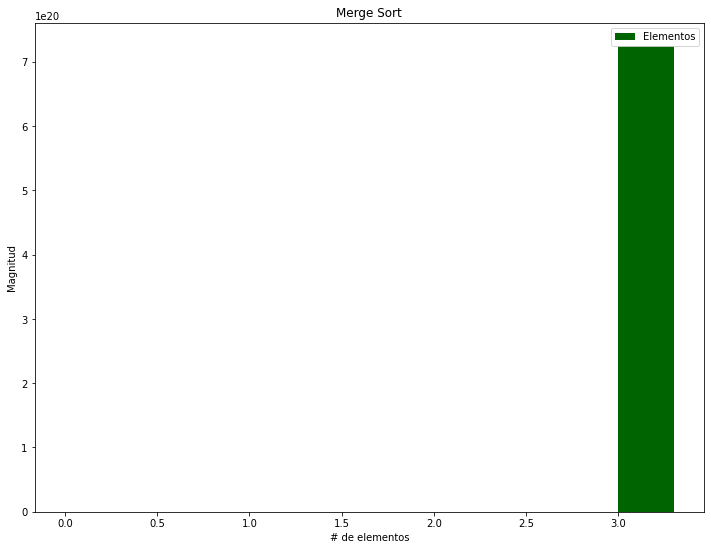

In [ ]:
#Actividad6 - ALGORITMO MERGE SORT
import random
import time
from time import perf_counter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import count

def crearSubArreglo(A, indIzq, indDer):
	return A[indIzq:indDer+1]

def Merge(A,p,q,r):
	Izq = crearSubArreglo(A,p,q)
	Der = crearSubArreglo(A,q+1,r)
	i=0
	j=0
	for k in range(p,r+1):
		if(j>=len(Der)) or (i < len (Izq)and Izq[i] and Izq[i] < Der[j]):
			A[k]=Izq[i]
			#print("lista Izquierda",Izq)
			i=i+1
		else:
			A[k]=Der[j]
			#print("lista derecha",Der)
			j=j+1

def MergeSort(A,p,r):
	if r - p > 0:
		q = int((p+r)/2)
		MergeSort(A,p,q)
		MergeSort(A,q+1,r)
		Merge(A,p,q,r)

if __name__ == "__main__":

		# Driver code
		A = [54, 724523015759812365462, 870112101220845, 8723]
		# A = []
		'''for i in range(0,999):
			n = random.randint(1, 10**24) #1000000000000000000000000
			#Magnitud de yotta 10^24 Septillón o Cuatrillón
			A.append(n)'''

		#print(A)
			
		#print("\nEl arreglo ordenado es: ")
		#print("\n")
		
		# Function Call
		start = perf_counter()
		MergeSort(A,0,len(A)-1)
		elapsed = perf_counter() - start
		
		#print(A)
		print("\nEl algoritmo \"Merge Sort\" tomó {:.2f}[ms]".format(elapsed*1000))

		# Graph Plot // Gráfica
		figure, ax = plt.subplots(figsize=(12,9))
		bar_list = ax.bar(range(len(A)), A, width=0.3, align="edge", color="darkgreen", label='Elementos')

		index=count()
		def update_figure(arr, bars, iteration):
				for bar, value in zip(bars, A):
						bar.set_height(value)
				
		anim = animation.FuncAnimation(figure, func=update_figure,
				fargs=(bar_list, next(index)), frames=MergeSort(A,0,len(A)-1), interval=100,
				repeat=False,save_count=150)
		print("\n")
		plt.ylabel('Magnitud')
		plt.xlabel('# de elementos')
		plt.title('Merge Sort')
		plt.legend()
		plt.show()

# **Actividad #7 (2 puntos)**
7.-) Programa: Cuente el número de ocurrencias (o frecuencia) en una matriz ordenada, Dada
una matriz ordenada “ de dos dimensiones” arr[][] y un número x, escriba una función que cuente las ocurrencias de x en arr[]. En la impresión en todo momento se debe imprimir la matriz, el
número x, y el número de ocurrencias.


In [ ]:
#Actividad7
def main():
    fila=3;
    columna=2;
    #se crea la matriz de nxm
    arr = [[0] * columna for i in range(fila)];
    
    #inicializar matriz
    arr[0][0] = 2;
    arr[0][1] = 2;
    arr[1][0] = 4;
    arr[1][1] = 4;
    arr[2][0] = 4;
    arr[2][1] = 12;
    #ingresar numero x
    x = int(input("ingrese numero que desea buscar: \n"));
    #recorrer la matriz
    coincidencia=0;
    for i in range(fila):
        for j in range(columna):
            #coincidencia
            if x==arr[i][j]:
                coincidencia +=1;
            #imprimir la matriz 
            print("tu matriz usada es:\n");
            for k in range(fila):
                for l in range(columna):
                    print(arr[k][l], end=' ');
                print("\n");
            print();
            print("numero buscado: ",x);
            print("coincidencias hasta el momento: ",coincidencia);
            print();

#imprimir la matriz y coincidencia final finales
    print("tu matriz usada fue:\n");
    for k in range(fila):
        for l in range(columna):
            print(arr[k][l], end=' ');
        print("\n");
    print();
    print("numero buscado: ",x);
    print("coincidencias totales: ",coincidencia);




if __name__ == "__main__":
    main()

ingrese numero que desea buscar: 
2
tu matriz usada es:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias hasta el momento:  1

tu matriz usada es:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias hasta el momento:  2

tu matriz usada es:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias hasta el momento:  2

tu matriz usada es:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias hasta el momento:  2

tu matriz usada es:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias hasta el momento:  2

tu matriz usada es:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias hasta el momento:  2

tu matriz usada fue:

2 2 

4 4 

4 12 


numero buscado:  2
coincidencias totales:  2


# **Actividad #8 (2 puntos)**

**8. Programa:** Encuentra elementos comunes en 2 matrices ordenadas. Dadas 2 matrices ordenadas en orden decreciente, imprima todos los elementos comunes en estas matrices. Nota: las matrices siempre deberán ser de 2 dimensiones, y en todo momento se debe poder ver en pantalla ambas matrices, y los valores que son comunes a ambas.

Las matrices deben ser de la misma dimensión, y se inicializan con valores que proporciona el usuario, las matrices pueden ser de hasta 10X10.

In [ ]:
#Actividad8

In [ ]:
#Actividad9

In [ ]:
#Actividad010